In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import glob

In [2]:
path = '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/'
files = path + 'Oct-12th-2022-*AM-Flight-Airdata.csv'
filesAM = sorted(glob.glob(files))
files = path + 'Oct-12th-2022-*PM-Flight-Airdata.csv'
filesPM = sorted(glob.glob(files))
# metto alla fine il primo file PM (in questo caso temporalemente successivo)
filesPM.append(filesPM[0])
filesPM.pop(0)
drone_files = filesAM + filesPM
drone_files

['/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-11-34AM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-11-38AM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-11-43AM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-11-51AM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-12-13PM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-12-23PM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-12-27PM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-12-32PM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022-12-38PM-Flight-Airdata.csv',
 '/Users/matteo/Documents/Unimib/Drone/Voli_m210_windsensor/Oct-12th-2022

In [3]:
df = pd.concat((pd.read_csv(f) for f in drone_files), ignore_index=True)
df.columns

Index(['time(millisecond)', 'datetime(utc)', 'latitude', 'longitude',
       'height_above_takeoff(meters)',
       'height_above_ground_at_drone_location(meters)',
       'ground_elevation_at_drone_location(meters)',
       'altitude_above_seaLevel(meters)', 'height_sonar(meters)', 'speed(m/s)',
       'distance(meters)', 'mileage(meters)', 'satellites', 'gpslevel',
       'voltage(v)', 'max_altitude(meters)', 'max_ascent(meters)',
       'max_speed(m/s)', 'max_distance(meters)', ' xSpeed(m/s)',
       ' ySpeed(m/s)', ' zSpeed(m/s)', ' compass_heading(degrees)',
       ' pitch(degrees)', ' roll(degrees)', 'isPhoto', 'isVideo',
       'rc_elevator', 'rc_aileron', 'rc_throttle', 'rc_rudder',
       'rc_elevator(percent)', 'rc_aileron(percent)', 'rc_throttle(percent)',
       'rc_rudder(percent)', 'gimbal_heading(degrees)',
       'gimbal_pitch(degrees)', 'battery_percent', 'voltageCell1',
       'voltageCell2', 'voltageCell3', 'voltageCell4', 'voltageCell5',
       'voltageCell6', 'curr

In [4]:
df_drone = df[['datetime(utc)', 'latitude', 'longitude', ' xSpeed(m/s)', ' ySpeed(m/s)', ' zSpeed(m/s)', 'ascent(meters)']].copy()
df_drone['datetime(utc)'] = pd.to_datetime(df_drone['datetime(utc)'], format='%Y-%m-%d %H:%M:%S') #+ pd.to_timedelta(df_drone.groupby(['datetime(utc)']).cumcount()*100, unit='ms')
df_drone.dtypes

datetime(utc)     datetime64[ns]
latitude                 float64
longitude                float64
 xSpeed(m/s)             float64
 ySpeed(m/s)             float64
 zSpeed(m/s)             float64
ascent(meters)           float64
dtype: object

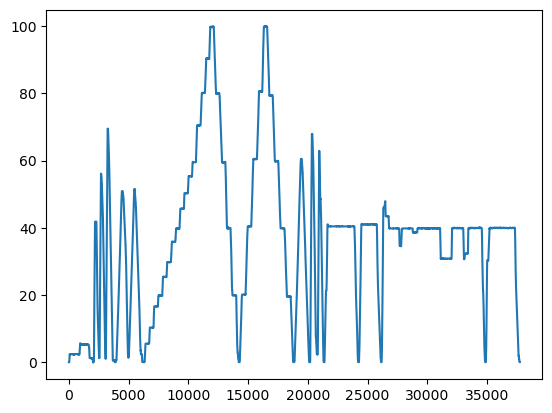

In [5]:
df_drone['ascent(meters)'].plot()

In [6]:
df_drone.groupby(['datetime(utc)']).count()['latitude'].value_counts()

10    1677
9     1128
8      543
11     415
7      205
6       52
5       15
4        5
12       5
2        3
3        1
Name: latitude, dtype: int64

In [7]:
df_drone_ave = df_drone.groupby(['datetime(utc)']).mean().reset_index()
df_drone_ave['datetime(utc)'][0]

Timestamp('2022-10-12 09:34:56')

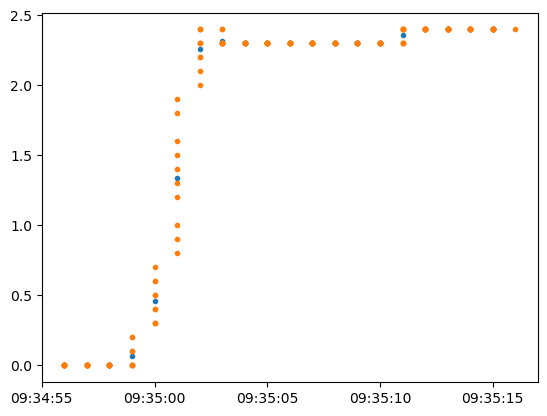

In [8]:
plt.plot(df_drone_ave['datetime(utc)'][0:20], df_drone_ave['ascent(meters)'][0:20],'.')
plt.plot(df_drone['datetime(utc)'][0:200], df_drone['ascent(meters)'][0:200],'.')

In [10]:
path = '/Users/matteo/Documents/Unimib/Drone/Sparvio_sensor/file_1-2/'
sparvio_files = path + '20221012_093055.csv'
df_spento = pd.read_csv(sparvio_files,sep=';',skiprows=9)
df_spento['Time (UTC)'] = '2022-10-12 ' + df_spento['Time (UTC)']
df_spento['Time (UTC)'] = pd.to_datetime(df_spento['Time (UTC)'], format='%Y-%m-%d %H:%M:%S').dt.floor('s')
df_spento_ave = df_spento.groupby(['Time (UTC)']).mean().reset_index()
df_spento_ave['Time (UTC)'][0]

Timestamp('2022-10-12 09:30:55')

In [12]:
df_spento.groupby(['Time (UTC)']).count()[' C.wspd'].value_counts()

5    107
2      1
4      1
Name:  C.wspd, dtype: int64

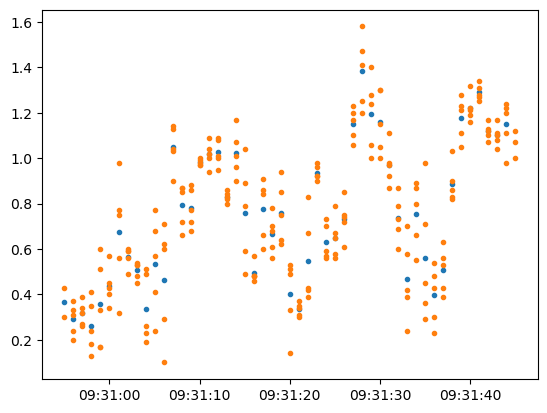

In [117]:
plt.plot(df_spento_ave['Time (UTC)'][0:50], df_spento_ave[' C.wspd'][0:50],'.')
plt.plot(df_spento['Time (UTC)'][0:250], df_spento[' C.wspd'][0:250],'.')

In [13]:
path = '/Users/matteo/Documents/Unimib/Drone/Sparvio_sensor/file_1-2/'
sparvio_files = path + '20221012_093249.csv'
df_s = pd.read_csv(sparvio_files,sep=';',skiprows=9)
df_s['Time (UTC)'] = '2022-10-12 ' + df_s['Time (UTC)']
df_s['Time (UTC)'] = pd.to_datetime(df_s['Time (UTC)'], format='%Y-%m-%d %H:%M:%S').dt.floor('s')
df_s_ave = df_s.groupby(['Time (UTC)']).mean().reset_index()
df_s_ave['Time (UTC)'][0]

Timestamp('2022-10-12 09:32:49')

In [14]:
df_s.groupby(['Time (UTC)']).count()[' C.wspd'].value_counts()

5    341
3      1
Name:  C.wspd, dtype: int64

In [121]:
df_merged = df_s_ave.merge(df_drone_ave, how='inner', left_on='Time (UTC)', right_on='datetime(utc)')

Text(0, 0.5, 'wspd')

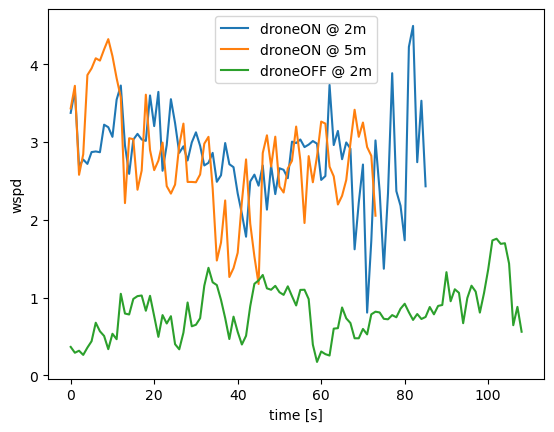

In [122]:
df_2m = df_merged.loc[(df_merged['ascent(meters)'] >= 2)&(df_merged['ascent(meters)'] <= 3)].reset_index()
df_5m = df_merged.loc[df_merged['ascent(meters)'] >= 5].reset_index()

plt.plot(df_2m[' C.wspd'], label='droneON @ 2m')
plt.plot(df_5m[' C.wspd'], label='droneON @ 5m')
plt.plot(df_spento_ave[' C.wspd'], label='droneOFF @ 2m')
plt.legend(); plt.xlabel('time [s]'); plt.ylabel('wspd')